In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

data = pd.read_excel('pck_results.xlsx')

print(data.head().to_string())
df = pd.DataFrame(data)

                                            nombre_imagen  threshold image_size  cantidad_true_keypoints  true_keypoints_visible  cantidad_pred_keypoints  pred_keypoints_visible    pck
0  imagen_001_jpg.rf.2a634f01a533e3e1518c478c8d4dde0f.jpg        0.1    144x256                       17                      17                       17                      17  100.0
1  imagen_001_jpg.rf.2a634f01a533e3e1518c478c8d4dde0f.jpg        0.5    144x256                       17                      17                       17                      17  100.0
2  imagen_001_jpg.rf.2a634f01a533e3e1518c478c8d4dde0f.jpg        0.9    144x256                       17                      17                       17                      17  100.0
3  imagen_002_jpg.rf.39766b197a04d8d1569b3e546fd07390.jpg        0.1    144x256                       17                      12                       17                      12  100.0
4  imagen_002_jpg.rf.39766b197a04d8d1569b3e546fd07390.jpg        0.5    144

In [2]:
# Asumiendo que tu DataFrame se llama df
estadisticos_pck = df.groupby('threshold')['pck'].agg(['mean', 'median', 'std']).reset_index()

# Renombrar las columnas para mayor claridad
estadisticos_pck.columns = ['threshold', 'media_pck', 'mediana_pck', 'desviacion_estandar_pck']

print(estadisticos_pck)

   threshold  media_pck  mediana_pck  desviacion_estandar_pck
0        0.1   95.91254        100.0                 6.745328
1        0.5  100.00000        100.0                 0.000000
2        0.9  100.00000        100.0                 0.000000


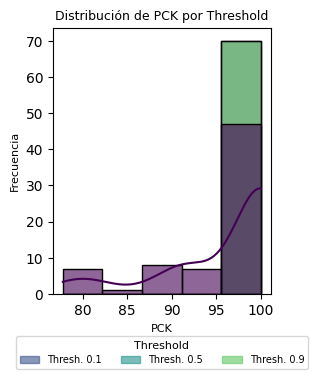

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar el tamaño del gráfico en pulgadas (8x8 cm ≈ 3.15x3.15 in)
plt.figure(figsize=(3.15, 5))

# Crear el histograma
ax = sns.histplot(
    data=df,
    x='pck',
    hue='threshold',
    bins=5,
    kde=True,
    palette='viridis',
    edgecolor='black',
    alpha=0.6,
    multiple='layer'
)

# Ajustar etiquetas y título (fuentes más pequeñas para el nuevo tamaño)
plt.xlabel('PCK', fontsize=8)
plt.ylabel('Frecuencia', fontsize=8)
plt.title('Distribución de PCK por Threshold', fontsize=9)

# --- Leyenda en la parte inferior (ajustada para tamaño pequeño) ---
unique_thresholds = df['threshold'].unique()
colors = sns.color_palette('viridis', n_colors=len(unique_thresholds))
handles = [plt.Rectangle((0, 0), 1, 1, color=colors[i], alpha=0.6) for i in range(len(unique_thresholds))]
labels = [f'Thresh. {t}' for t in unique_thresholds]  # Texto abreviado para ahorrar espacio

plt.legend(
    handles,
    labels,
    title='Threshold',
    loc='lower center',
    bbox_to_anchor=(0.5, -0.3),  # Ajuste fino para gráficos pequeños
    fontsize=7,                  # Fuente más pequeña
    title_fontsize=8,            # Título de leyenda más pequeño
    ncol=len(unique_thresholds), # Leyenda en fila horizontal
)

# Ajustar márgenes para evitar cortes
plt.tight_layout(rect=[0, 0.1, 1, 0.95])  # rect=[left, bottom, right, top]
plt.show()

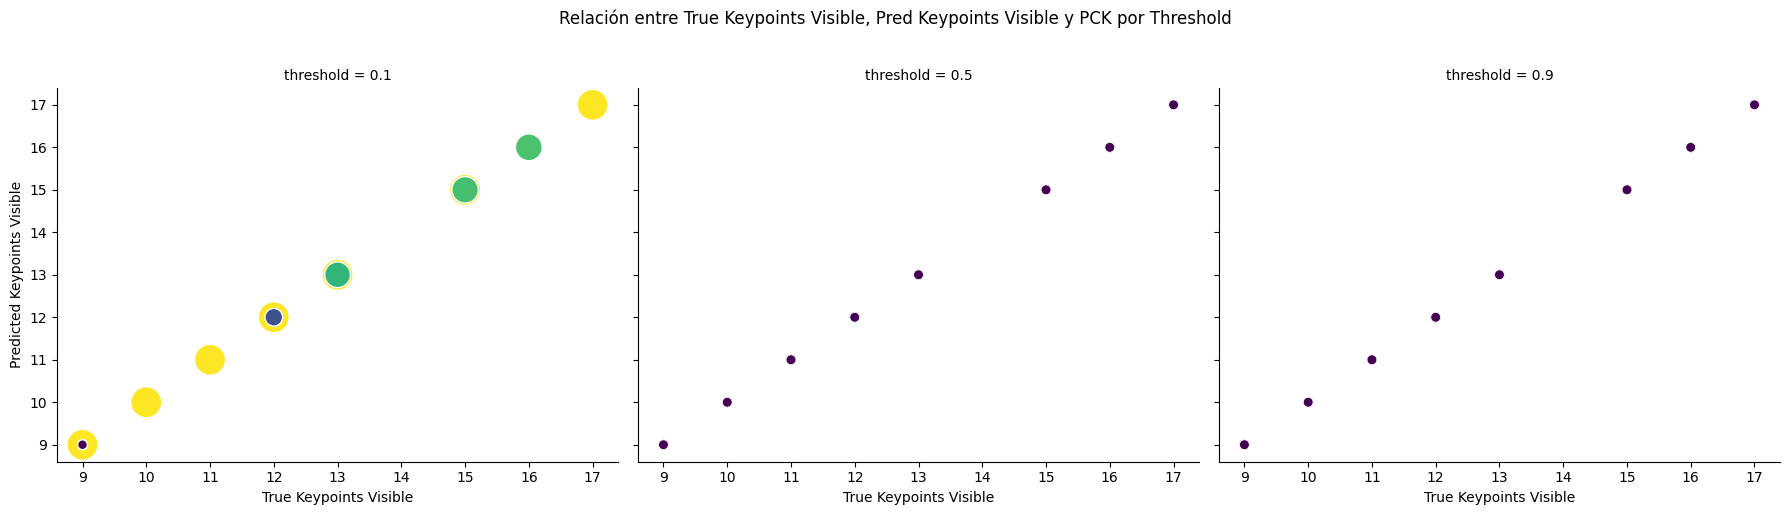

In [4]:
# Crear el gráfico de dispersión con facetas por threshold
g = sns.FacetGrid(df, col='threshold', col_wrap=3, height=5, aspect=1.2)
g.map_dataframe(
    sns.scatterplot,
    x='true_keypoints_visible',
    y='pred_keypoints_visible',
    size='pck',
    sizes=(50, 500),  # Ajusta el rango de tamaños de los puntos
    hue='pck',        # Colorear los puntos según el valor de pck
    palette='viridis' # Paleta de colores
)

# Añadir etiquetas y título
g.set_axis_labels('True Keypoints Visible', 'Predicted Keypoints Visible')
g.fig.suptitle('Relación entre True Keypoints Visible, Pred Keypoints Visible y PCK por Threshold', y=1.02)

# Ajustar el diseño y mostrar el gráfico
plt.tight_layout()
plt.show()

# Cuales son las imagenes que presentan menor valor con respecto a un umbral PCK

In [5]:
filtered_df = df[df['pck'] < 90]
print(filtered_df.to_string())

                                              nombre_imagen  threshold image_size  cantidad_true_keypoints  true_keypoints_visible  cantidad_pred_keypoints  pred_keypoints_visible        pck
30   imagen_011_jpg.rf.efc4f6570869d250cc6316a35f6b4b26.jpg        0.1    147x256                       17                      10                       17                      10  80.000000
48   imagen_017_jpg.rf.122563551b80765ec9c83d234d55aa60.jpg        0.1    144x256                       17                      11                       17                      11  81.818182
60   imagen_021_jpg.rf.d5d819dec165988997ada2c000f85db7.jpg        0.1    146x256                       17                       9                       17                       9  88.888889
87   imagen_030_jpg.rf.da5e9d05544f94084a2875e82c78fef5.jpg        0.1    146x256                       17                      17                       17                      17  88.235294
90   imagen_031_jpg.rf.d01ad07675500025673f27

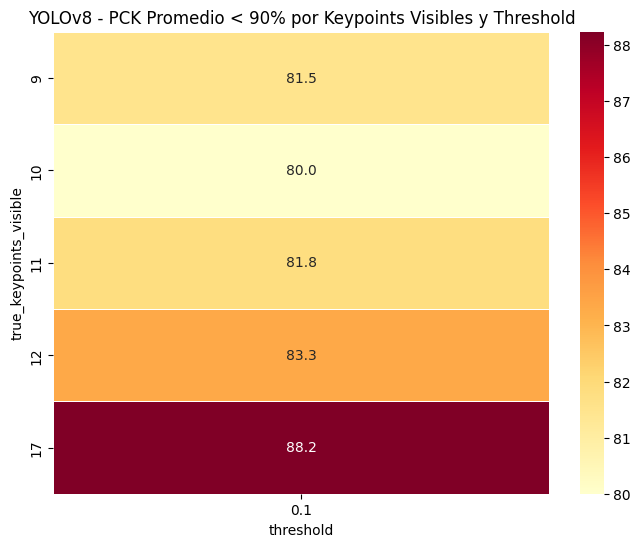

In [6]:
# Crear tabla pivote
heatmap_data = filtered_df.pivot_table(
    index="true_keypoints_visible",
    columns="threshold",
    values="pck",
    aggfunc="mean"
)

# Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(
    heatmap_data,
    annot=True,
    cmap="YlOrRd",
    fmt=".1f",
    linewidths=0.5
)
plt.title("YOLOv8 - PCK Promedio < 90% por Keypoints Visibles y Threshold")
plt.show()

In [7]:
import os
import importlib , pck, pandas as pd # Importar importlib para recargar módulos
importlib.reload(pck)
from pck import PCK

# Configuracion
basepath = '/Users/apple/Documents/uziel/'
images_path = os.path.join(basepath, 'dataset/images/')
labels_path = os.path.join(basepath, 'dataset/labels/')
evaluator = PCK(basepath, images_path, labels_path)


image 1/1 /Users/apple/Documents/uziel/dataset/images/imagen_011_jpg.rf.efc4f6570869d250cc6316a35f6b4b26.jpg: 640x384 1 person, 100.0ms
Speed: 5.3ms preprocess, 100.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 384)

image 1/1 /Users/apple/Documents/uziel/dataset/images/imagen_017_jpg.rf.122563551b80765ec9c83d234d55aa60.jpg: 640x384 1 person, 73.6ms
Speed: 1.2ms preprocess, 73.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)

image 1/1 /Users/apple/Documents/uziel/dataset/images/imagen_021_jpg.rf.d5d819dec165988997ada2c000f85db7.jpg: 640x384 1 person, 75.7ms
Speed: 1.1ms preprocess, 75.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)

image 1/1 /Users/apple/Documents/uziel/dataset/images/imagen_030_jpg.rf.da5e9d05544f94084a2875e82c78fef5.jpg: 640x384 1 person, 71.3ms
Speed: 1.0ms preprocess, 71.3ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 384)

image 1/1 /Users/apple/Documents/uziel/dataset/images/imagen_031_

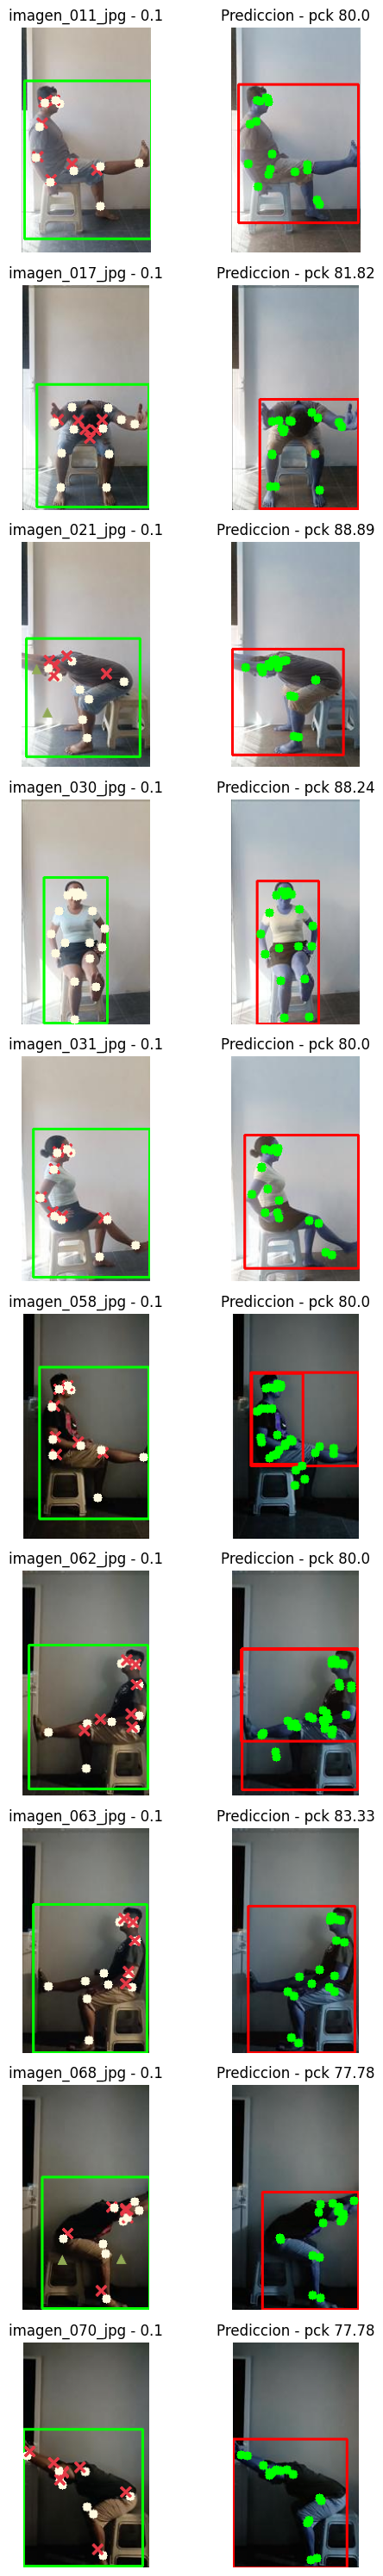

In [8]:
import re
num_rows = len(filtered_df)
fig, axes = plt.subplots(num_rows, 2, figsize=(6, 3 * num_rows)) 

for i, (index, row) in enumerate(filtered_df.iterrows()):
    # Obtener las rutas de la imagen y la etiqueta
    image_path = os.path.join(images_path, row['nombre_imagen'])
    label_path = os.path.join(labels_path, os.path.splitext(row['nombre_imagen'])[0] + '.txt')

    # Dibujar keypoints originales y predichos
    img_with_original_keypoints = evaluator.draw_original_keypoints(image_path, label_path)
    img_with_predicted_keypoints, inference_results = evaluator.draw_predicted_keypoints(image_path)

    # extraer todo lo que esta antes de '.rf'
    match = re.match(r"^(.*?)(_jpg)\.rf\.", row['nombre_imagen'])

    image_name = match.group(1) + match.group(2) if match else 'Not found'

    # Mostrar la imagen con etiquetas originales
    axes[i, 0].imshow(img_with_original_keypoints)
    axes[i, 0].set_title(f'{image_name} - {row['threshold']}')
    axes[i, 0].axis('off')

    # Mostrar la imagen con etiquetas predichas
    axes[i, 1].imshow(img_with_predicted_keypoints)
    axes[i, 1].set_title(f'Prediccion - pck {round(row['pck'],2)}')
    axes[i, 1].axis('off')

# Ajustar el espacio entre subplots
plt.tight_layout()

# Mostrar la figura
plt.show()

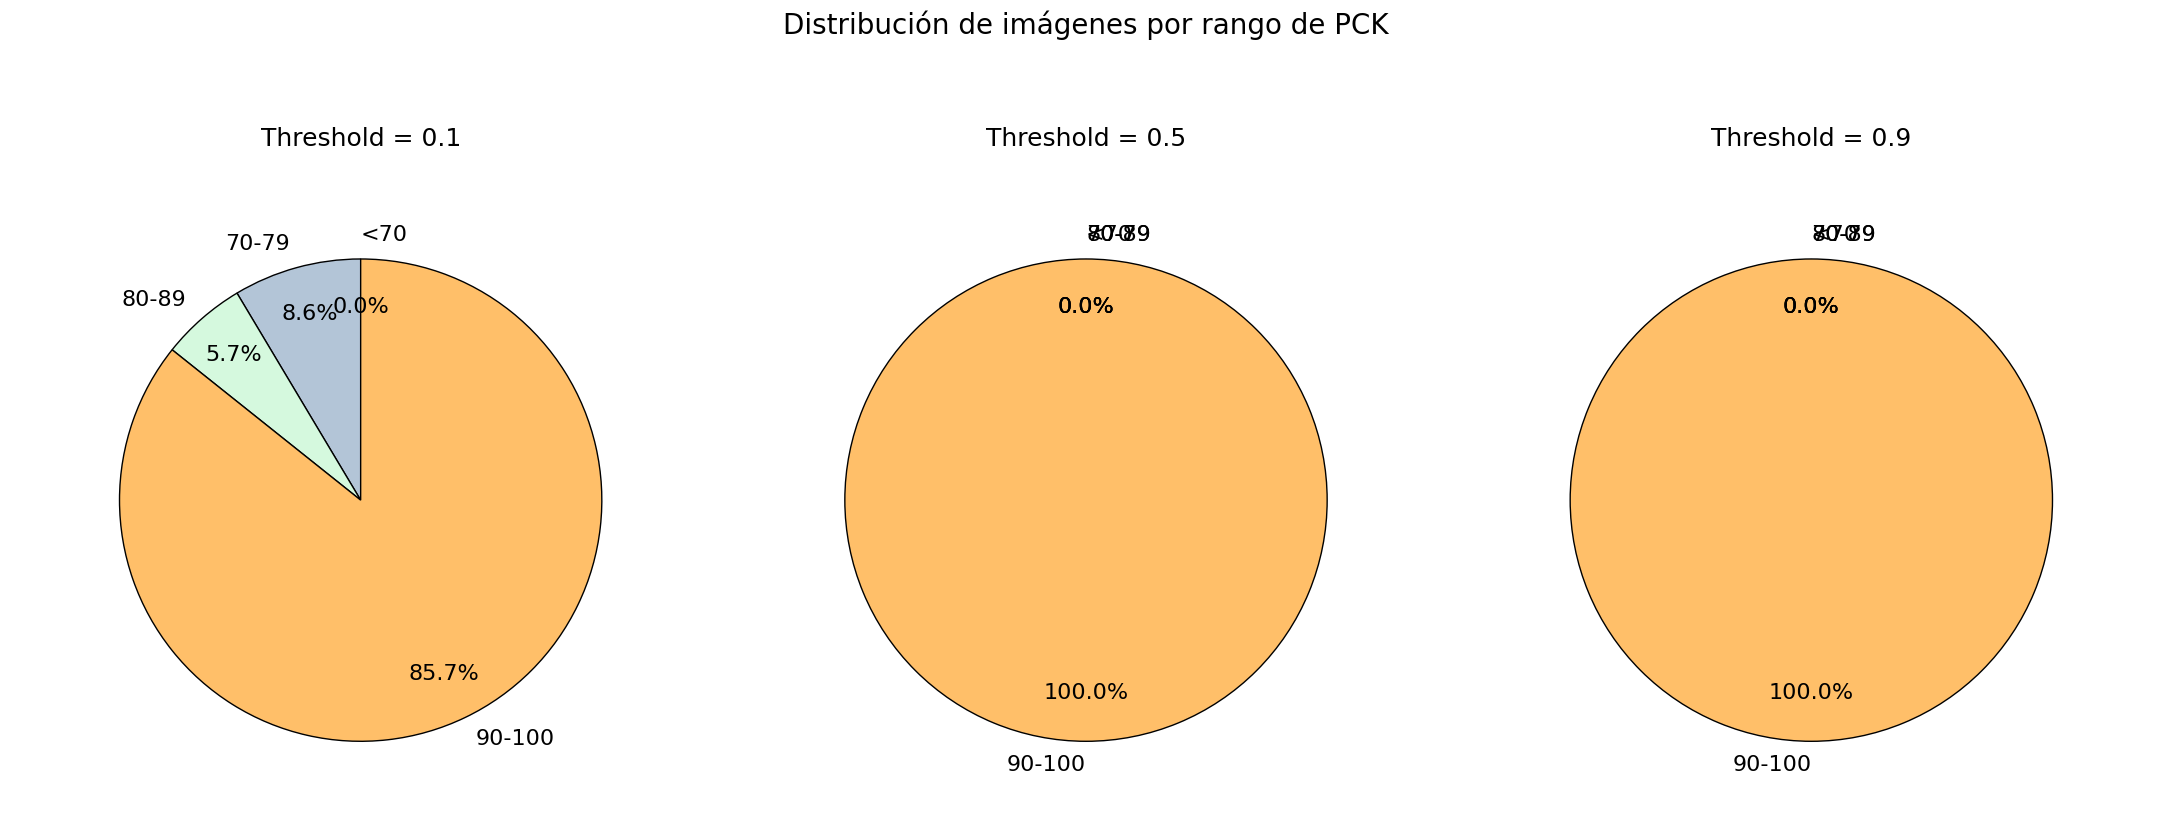

In [9]:
# Configuración de estilos y tamaños de fuente
plt.rcParams.update({
    'font.size': 16,          # Tamaño de fuente general
    'axes.titlesize': 18,     # Tamaño de título de cada subplot
    'figure.titlesize': 20    # Tamaño del título principal
})

# Definir los rangos y etiquetas
bins = [0, 70, 80, 90, 100]
labels = ['<70', '70-79', '80-89', '90-100']

# Crear una figura con subplots para cada threshold
fig, axes = plt.subplots(1, 3, figsize=(22, 8))
fig.suptitle('Distribución de imágenes por rango de PCK', y=1.05)

# Colores personalizados para consistencia
colors = ['#DAF0EE', '#B3C5D7', '#D5F9DE', '#FFBF69']
wedge_props = {'edgecolor': 'black', 'linewidth': 1}

# Iterar por cada threshold
for i, threshold in enumerate([0.1, 0.5, 0.9]):
    # Filtrar y categorizar datos
    df_threshold = df[df['threshold'] == threshold].copy()
    df_threshold['pck_category'] = pd.cut(df_threshold['pck'], bins=bins, labels=labels)
    counts = df_threshold['pck_category'].value_counts().sort_index()
    
    # Crear pie chart
    axes[i].pie(
        counts,
        labels=labels,
        autopct='%1.1f%%',
        startangle=90,
        colors=colors,
        wedgeprops=wedge_props,
        textprops={'fontsize': 16},  # Tamaño de fuente para porcentajes
        pctdistance=0.8               # Ajustar posición de porcentajes
    )
    
    axes[i].set_title(f'Threshold = {threshold}', pad=20)
    axes[i].axis('equal')

# Ajustar layout y mostrar
plt.tight_layout()
plt.show()

In [10]:
ap_stats = df.groupby('threshold')['pck'].describe()
print(ap_stats.to_string())

           count       mean       std         min         25%    50%    75%    max
threshold                                                                         
0.1         70.0   95.91254  6.745328   77.777778   91.826923  100.0  100.0  100.0
0.5         70.0  100.00000  0.000000  100.000000  100.000000  100.0  100.0  100.0
0.9         70.0  100.00000  0.000000  100.000000  100.000000  100.0  100.0  100.0
